In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Pandas Profiling Report')
#profile

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

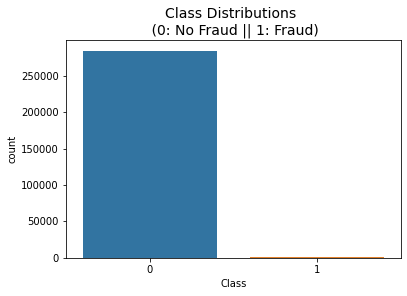

In [5]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [6]:
import time
df['hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
df.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10919,21
1.0,7687,6
2.0,4212,10
3.0,3269,57
4.0,3476,17
5.0,2185,23
6.0,2979,11
7.0,4093,9
8.0,7219,23


## Scaling

In [7]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [8]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,hour
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.0


## Splitting the Data

In [9]:
X = df.drop('Class',axis = 1)
y = df['Class']

## Over-sampling: SMOTE


In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

print(y_sm.value_counts())

1    284315
0    284315
Name: Class, dtype: int64


In [11]:
X_sm['hour'] = X_sm['hour'].apply(np.floor)
hour_vec = X_sm['hour'] 
X_sm = X_sm.drop('hour',axis = 1)

# PCA

In [12]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_x = pca_model.fit_transform(X_sm)


In [13]:
# add the hours vector
pca_x = np.concatenate((pca_x ,pd.get_dummies(hour_vec).values),axis=1)

## Train - Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_x, y_sm,test_size = .33, random_state=0)

## Model & Tunning

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

classifiers = {
    "LogisiticRegression":      [LogisticRegression(),
                                    {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],


    "DecisionTreeClassifier":   [DecisionTreeClassifier(), 
                                    {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}],


    "ExtraTreesClassifier":     [ExtraTreesClassifier(),
                                    {'n_estimators': [50,126,25],'min_samples_leaf': [20,50,5],'min_samples_split': [15,36,5]}],

    "XGBClassifier":            [XGBClassifier(),
                                    {'max_depth': [2,4,6,60],'n_estimators': [50,100,200]}]

    }

cvS = StratifiedShuffleSplit(n_splits=5, test_size=.30, random_state=15)
models = []
scores = []

for key, classifier in classifiers.items():
    model = GridSearchCV(classifier[0],classifier[1],cv=cvS, scoring = 'roc_auc')
    model.fit(X_train, y_train)
    models.append(model)
    scores.append(model.best_score_)
    print(model.best_estimator_.__class__.__name__,": ",round(model.best_score_ * 100, 2).astype(str) + '%')

## taking the best model
best_model = models[np.argmax(scores)].best_estimator_

LogisticRegression :  97.14%
DecisionTreeClassifier :  96.97%
ExtraTreesClassifier :  99.3%
XGBClassifier :  99.8%


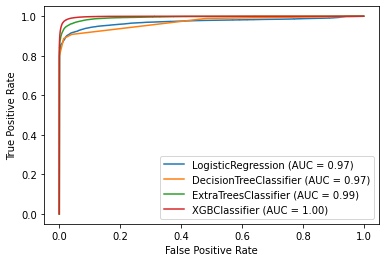

In [16]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
for i in models:
    plot_roc_curve(i.best_estimator_, X_test, y_test, ax=ax)

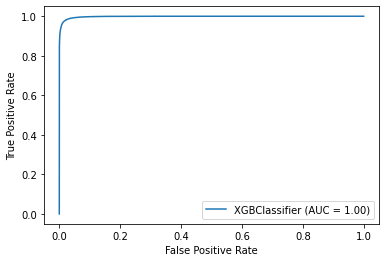

In [17]:
plot_roc_curve(best_model, X_test, y_test)


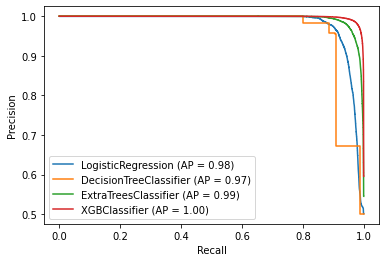

In [21]:
from sklearn.metrics import plot_precision_recall_curve

ax = plt.gca()
for i in models:
    plot_precision_recall_curve(i.best_estimator_, X_test, y_test, ax=ax)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# predict y_test with the best model
pred_y = best_model.predict(X_test)

###############################################################
print(classification_report(y_test,pred_y))

print('using the following params:', best_model.get_params,"\n")

print(confusion_matrix(y_test,pred_y),"\n")

print("accuracy score: ", accuracy_score(y_test, pred_y))

precision    recall  f1-score   support

           0       0.98      0.98      0.98     93693
           1       0.98      0.98      0.98     93955

    accuracy                           0.98    187648
   macro avg       0.98      0.98      0.98    187648
weighted avg       0.98      0.98      0.98    187648

using the following params: <bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=60,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)> 

[[91802  1891]
 [ 1932 92023]] 

accu